<h1><center>Song Popularity Prediction</center></h1>

<h3><center>By:<br> 
() Aamir Sayani (aamir.sayani@sjsu.edu),  <br>
(005825053) Freda Lam (takman.lam@sjsu.edu), <br>
(014628861) Sahana Halady (sahana.halady@sjsu.edu),<br>
(014628952) Indira Neela (Indira.neela@sjsu.edu)</center></h3>

### Motivation:

When figuring out a machine learning project, our group decided to first come up with common interests. Through that, we all landed on music. We were all fascinated about how Spotify and Apple Music all have the best recommendations, how a lot of artists have a unique recipe for success, and how the industry is a massive market. When figuring out topics, we were curious to see if we can build a model that helps find the secret solution to a “popular song.” What is needed for a song to become a hit?

	

With any machine learning project, the project is as good as the data you find. Luckily, we were able to find a dataset from Columbia University called the Million Song Dataset, pulled through Echo Nest. Together with the business problem and the large dataset with many features, we had the tools needed to create the best model.   


This project helps in understanding the key to a song becoming popular and inturn helps in predicting whether a song would be polular or not. This helps the investers and the song writers and singers in understanding if they would get success through a particular song or not that is being released.

### Apporach:

Here we are using the million song dataset which contains 53 features describing the song. This dataset is a free dataset and doesnot need any permissions to acesses it.

The libraries that are used to perform the complete task, i.e, from reading the the dataset to perfoming the task of prediction is either a built class or a pre-exixting library. 

In [1]:
import os
import sys
import glob
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Code Explaination:

The first problem we had to solve was the format of the data. After pulling the data, we had to first reformat the data to which can convert the data from h5 to csv file format. We generated a script that produced the data in csv format that we could use to train our model.  

In [2]:
def get_headers(df):
    return list(df.columns.values)

def HDFS_to_CSV(path,output_file,return_df=False):
    base_dir = path
    ext = ".H5"
    df = pd.DataFrame()
    first_run = True
    for root,dirs,files in os.walk(base_dir):
        files = glob.glob(os.path.join(root,"*"+ext))
        for f in files:
            store = pd.HDFStore(f)
            song_analysis = pd.read_hdf(store,'/analysis/songs')
            metadata = pd.read_hdf(store,'/metadata/songs')
            musicbrainz = pd.read_hdf(store,'musicbrainz/songs')
            frames = [song_analysis,metadata,musicbrainz]
            song_df = pd.concat(frames,axis=1)
            
            if return_df:
                df.append(song_df)

            if first_run:
                song_df.to_csv(output_file)
                first_run = False
            else:
                with open(output_file, 'a') as fl:
                    song_df.to_csv(fl, header=False)
            store.close()
    if return_df:
        return df

def get_songs_df_from_csv(filename):
    return pd.read_csv(filename,index_col=0)   

def clean(df):
    df = df.fillna(0)
    #Drop rows with year = 0
    df = df.drop(df[df.year == 0].index)
    #Drop rows with song hotness = 0
    df = df.drop(df[df.song_hotttnesss==0].index)

    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

def drop_specific_cols(df):
    cols = ['analysis_sample_rate','danceability','energy','genre','artist_7digitalid','audio_md5','analyzer_version','artist_latitude','artist_location','artist_longitude','artist_playmeid','track_7digitalid','release_7digitalid','key_confidence','mode_confidence','time_signature_confidence']
    df = df.drop(cols,axis=1)
    idx_cols = 'idx_'
    return df[df.columns.drop(list(df.filter(regex=idx_cols)))]


In [3]:
#GETTING DATA
songs_df = get_songs_df_from_csv('./msd_summary.csv')

#During the csv making process, I was merging different dfs into one df and df index info was lost. Let's reset the indices
songs_df.reset_index(drop=True,inplace=True)

print(f"Number of Rows: {len(songs_df)}")
print(f"Number of Columns:{len(songs_df.columns)}")
songs_df.head()


Number of Rows: 1000000
Number of Columns:53


,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid,idx_artist_mbtags,year
0,22050,aee9820911781c734e7694c5432990ca,0.0,252.05506,2.049,0.0,0,0,0,0,...,0,0,Monster Ballads X-Mas,633681,0.542899,SOQMMHC12AB0180CB8,Silent Night,7032331,0,2003
1,22050,ed222d07c83bac7689d52753610a513a,0.0,156.55138,0.258,0.0,0,0,0,0,...,0,0,Karkuteillä,145266,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,1514808,0,1995
2,22050,96c7104889a128fef84fa469d60e380c,0.0,138.97098,0.000,0.0,0,0,0,0,...,0,0,Butter,625706,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,6945353,0,2006
3,22050,0f7da84b6b583e3846c7e022fb3a92a2,0.0,145.05751,0.000,0.0,0,0,0,0,...,0,0,De Culo,199368,NaN,SOBNYVR12A8C13558C,Si Vos Querés,2168257,0,2003
4,22050,228dd6392ad8001b0281f533f34c72fd,0.0,514.29832,0.000,0.0,0,0,0,0,...,0,0,Rene Ablaze Presents Winter Sessions,209038,NaN,SOHSBXH12A8C13B0DF,Tangle Of Aspens,2264873,0,0


The below code cleans the data for and null values. If the year of the song is 0 then that row is completely deleated and if the song hotness is 0 then those rows are also dropped. The Many of the feature columns are dropped as we do not have any use with those columns along the way. 

After providing these changes, our dataset drastically became more tangible to work. We had shrunk down the million song dataset to approximately 306,000, and features from 53 to 19. We were now ready to learn more about our data. 

In [4]:
#DATA CLEANING
df = clean(songs_df)
df = drop_specific_cols(df)
print(f"Number of Columns after data cleansing: {len(df.columns)}")
print(f"Number of rows after cleansing: {df.year.count()}")
df.head()

Number of Columns after data cleansing: 19
Number of rows after cleansing: 306298


,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,track_id,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_name,release,song_hotttnesss,song_id,title,year
0,252.05506,2.049,10,-4.829,0,236.635,87.002,4,TRMMMYQ128F932D901,0.649822,0.394032,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,Monster Ballads X-Mas,0.542899,SOQMMHC12AB0180CB8,Silent Night,2003
1,156.55138,0.258,9,-10.555,1,148.660,150.778,1,TRMMMKD128F425225D,0.439604,0.356992,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,Karkuteillä,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,1995
2,138.97098,0.000,7,-2.060,1,138.971,177.768,4,TRMMMRX128F93187D9,0.643681,0.437504,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,Butter,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,2006
13,318.45832,0.502,10,-10.670,1,306.265,67.567,3,TRMMMBW128F4260CAE,0.621826,0.406985,AREMPER1187B9AEB42,14efbb08-c3d8-404c-9ead-ad71fa586ee6,Tiger Lou,The Loyal,0.463490,SOMPVQB12A8C1379BB,Pilots,2005
15,262.26893,0.194,11,-3.925,1,259.419,122.332,4,TRMMMKI128F931D80D,0.529819,0.410229,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,Lena 20 År,0.212045,SOSDCFG12AB0184647,006,1998


# Data Exploration

We tried exploring the data by plotting graphs showing various features of the songs and using various columns from the dataset.

The below heat map shows different features present in the dataset on both the X and Y axis of the map.

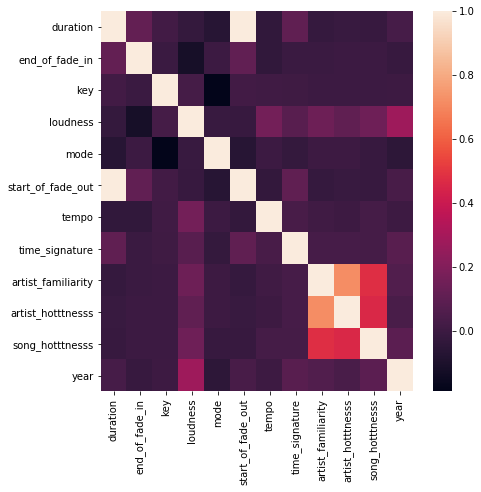

In [5]:
#Data Exploration
corr = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr)

In [6]:
df.describe()

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,year
count,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000,306298.000000
mean,245.989623,0.876206,5.313675,-9.289077,0.659779,236.675818,125.457849,3.636984,0.618607,0.430780,0.487166,1999.742339
std,110.965065,2.833747,3.594272,4.789644,0.473784,108.672545,34.916439,1.180530,0.114854,0.095562,0.156768,9.722458
min,0.678730,0.000000,0.000000,-52.559000,0.000000,0.679000,0.000000,0.000000,0.000000,0.000000,0.187701,1922.000000
25%,185.991380,0.000000,2.000000,-11.636000,0.000000,177.946000,99.262250,4.000000,0.546981,0.376689,0.372530,1996.000000
50%,231.078730,0.194000,5.000000,-8.198000,1.000000,221.553000,122.631000,4.000000,0.614654,0.421589,0.485530,2003.000000
75%,284.551380,0.428000,9.000000,-5.852000,1.000000,273.874000,146.489000,4.000000,0.691134,0.480575,0.597641,2007.000000
max,3007.738320,358.214000,11.000000,3.966000,1.000000,3007.738000,280.955000,7.000000,1.000000,1.082503,1.000000,2011.000000


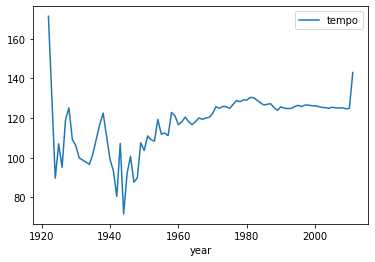

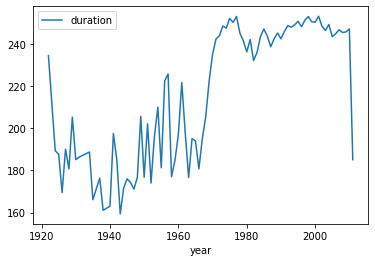

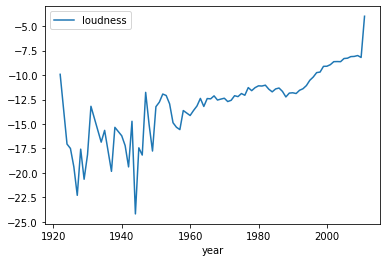

In [7]:
agg_df = df.groupby(df.year).mean().reset_index()
agg_df.plot(x='year',y='tempo')

agg_df.plot(x='year',y='duration')

agg_df.plot(x='year',y='loudness')

From these charts, we were able to get an idea of how volatile different sound metrics were over the years. 
Through feature engineering, we created a variable called isPopular. With this variable, we labeled songs as “popular” if they were higher than the mean song hotness. Below is some data based on songs that were popular songs. 

Song Popularity distribution = 1


The below graph is a histogram which represents the number of songs released over the years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B73E98F588>]],
      dtype=object)

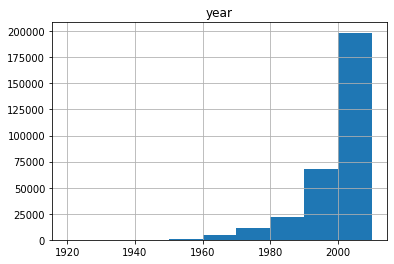

In [8]:
bins = range(1920,2020,10)
df.hist(column='year',bins = bins)

The mean of song hotness is calculated, which is 0.487166. Using this mean we create another column called 'isPopular' column which is 1 if the song hotness is greater the mean and if the song hotness id lesser than the mean then the value is kept as 0. Thus, this column uses the mean of the song hotness as a threshold. Later the dataset is filtered with only those values which has the 'isPopular' value as one.

In [9]:
#Creating a new feature called isPopular based on if the song hotness is above mean or not
song_hotness_mean = df.song_hotttnesss.mean()#0.487166
threshold = song_hotness_mean
df['isPopular'] = 0
df.loc[(df.song_hotttnesss>threshold), 'isPopular']  = 1

In [10]:
df.loc[df.song_hotttnesss>threshold, ['song_id', 'isPopular']]

,song_id,isPopular
0,SOQMMHC12AB0180CB8,1
2,SOGTUKN12AB017F4F1,1
17,SOKOVRQ12A8C142811,1
18,SOIMMJJ12AF72AD643,1
33,SOOLRHW12A8C142643,1
...,...,...
999971,SOQVXTX12AB017F110,1
999973,SOIQVTG12AC468E9C0,1
999990,SOFAXZU12AB01881C4,1
999992,SOBODSE12A8C13EBD6,1


In [11]:
df[df.song_hotttnesss<threshold]

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,track_id,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_name,release,song_hotttnesss,song_id,title,year,isPopular
1,156.55138,0.258,9,-10.555,1,148.660,150.778,1,TRMMMKD128F425225D,0.439604,0.356992,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,Karkuteillä,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,1995,0
13,318.45832,0.502,10,-10.670,1,306.265,67.567,3,TRMMMBW128F4260CAE,0.621826,0.406985,AREMPER1187B9AEB42,14efbb08-c3d8-404c-9ead-ad71fa586ee6,Tiger Lou,The Loyal,0.463490,SOMPVQB12A8C1379BB,Pilots,2005,0
15,262.26893,0.194,11,-3.925,1,259.419,122.332,4,TRMMMKI128F931D80D,0.529819,0.410229,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,Lena 20 År,0.212045,SOSDCFG12AB0184647,006,1998,0
16,216.47628,2.032,6,-14.379,1,208.062,99.214,4,TRMMMUT128F42646E8,0.685503,0.446733,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,Cover Girl,0.270776,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,1994,0
27,210.93832,0.247,1,-7.664,1,210.938,207.903,4,TRMMMKD12903CF219E,0.729867,0.417882,AREH0O41187FB4C405,83e32d32-fee5-45de-a4b6-b49956a069eb,Skinlab,Nerve Damage,0.224820,SOWUMAZ12A67ADE769,Take As Needed,2002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999972,561.18812,6.113,4,-20.353,0,545.483,95.391,4,TRYYYJZ128F424BFA1,0.771815,0.547589,ARNLVQB1187B9AEAB0,e57f0cac-4f56-473c-8d7e-d93f753fd586,Steve Miller Band,Rock Love,0.259943,SOJYTFC12A6D4FD812,Deliverance,1971,0
999977,218.56608,0.062,6,-9.823,0,212.027,120.018,4,TRYYYLV128F14AFD76,0.496291,0.338061,ARI9UV41187B98AB58,05498d7c-5bd0-40fa-aabf-a39f34efba5c,Kreidler,Eve Future,0.215080,SOYCIHR12A6D4FBC6A,Reflectuum,2002,0
999979,462.26240,0.000,3,-6.673,0,451.466,144.102,4,TRYYYFV128F4277D53,0.657696,0.537043,ARH65291187B989DB5,250c38d6-0353-4c22-a371-f305d908573c,Starflyer 59,The Fashion Focus,0.427583,SOHYZUP12B0B8064C3,Too Much Fun,1998,0
999984,88.45016,5.608,9,-17.182,0,88.450,93.804,3,TRYYYOU128F426B209,0.560206,0.376075,ARHHIW21187FB5BD76,92ff6a4e-7070-4ddc-a62f-da9833aa236a,Coronatus,Lux Noctis,0.450762,SOIQNVK12A8C13B061,Interrotte Speranze,2007,0


The dataset containing the most popluar songs is as follows:

In [12]:
#Most Popular Songs
df.sort_values(by=['song_hotttnesss','year'],ascending=False)[['title','artist_name','release','song_hotttnesss','year']].head(10)

,title,artist_name,release,song_hotttnesss,year
69427,If We Ever Meet Again,Timbaland / Katy Perry,If We Ever Meet Again (Featuring Katy Perry),1.0,2010
78108,Alice,Avril Lavigne,Almost Alice,1.0,2010
85836,Cooler Than Me,Mike Posner,Cooler Than Me,1.0,2010
196742,Somebody To Love,Justin Bieber,My Worlds,1.0,2010
332746,Holiday,Vampire Weekend,Contra,1.0,2010
424919,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B,B.o.B Presents: The Adventures of Bobby Ray,1.0,2010
711682,Somebody To Love,Justin Bieber,My World 2.0,1.0,2010
712993,Odessa,Caribou,Odessa,1.0,2010
746866,Alice,Avril Lavigne,Alice,1.0,2010
828866,Tighten Up,The Black Keys,Tighten Up,1.0,2010


The features of the dataset are still too many to work with. Thus, the song features still need to be further filtered to get a proper results. This can be done using any of the machine learning algorithm. We chose random forest regression method as it gave the best results when compared to decision tree or other methods.

In [13]:
#Feature Importance and Reduction

from sklearn.ensemble import RandomForestRegressor
X = df.drop(['song_hotttnesss','year','isPopular'],axis=1)
X = X.select_dtypes(exclude=[object])
Y = df['song_hotttnesss'].values

model = RandomForestRegressor(n_estimators=10,max_depth=40)
model.fit(X,Y)

RandomForestRegressor(max_depth=40, n_estimators=10)

After the random forest regression is applied the features are reduced to the top ten features of the dataset, to get maximum accuracy for the machine learning model. After the feature filtering is done the dataset is now ready to be applied for the machine learning model. The top features selected from the dataset are as displayed below.

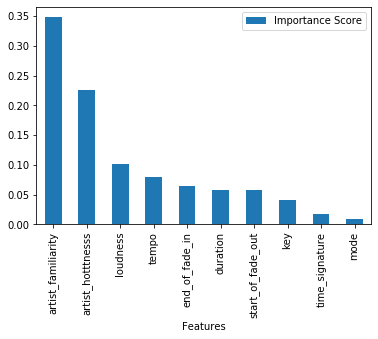

In [14]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.plot(x='Features',y='Importance Score',kind='bar')

### Model Selection

After feature filtering we performed various machine learning models on the dataset to predict if the given song is popular or not. Many machine learning models have been used to finally select a machine learning model which gives the hightest accuracy according to the given dataset.

The complete dataset was split into two parts, training datset and testing dataset. The training dataset consisted of 70% of the complete dataset while the test dataset consisted of the remaining 30% of the dataset.

#### Linear Regression Model

Linear regression model has been in use since a very long time. Linear regression is a linear model, i.e, a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression.

The first machine learning model that is applied is linear regression. Here, multiple linear regression model is applied. This regression model is applied to the training and testing datasets and model is fitted accordingly. 

In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('song_hotttnesss',axis=1)
X = X.select_dtypes(exclude=[object])
Y = df['song_hotttnesss'].values

trainX, testX, trainY, testY = train_test_split(X, Y, train_size=0.70)

lm = LinearRegression()

lm.fit(trainX,trainY)

LinearRegression()

The datasets are predicted for popularity of the song depending on the features of the song. Mean error square is also applied to the datasets and accuracy score is calculated for liner regression model.

In [16]:
from sklearn import metrics

pred_train = lm.predict(trainX)
pred_test = lm.predict(testX)

mse_train = metrics.mean_squared_error(trainY,pred_train)
mse_test = metrics.mean_squared_error(testY,pred_test)

r2_train = metrics.r2_score(trainY,pred_train)
r2_test = metrics.r2_score(testY,pred_test)

print(f"mse_train = {mse_train}")
print(f"mse_test = {mse_test}")
print(f"r2_train = {r2_train}")
print(f"r2_test = {r2_test}")


mse_train = 0.007218607132177344
mse_test = 0.0072431559141273435
r2_train = 0.7060064306105618
r2_test = 0.705904569545614


After the acuracy calculation for the model we found that the accuracy of the model is 70.6% for training dataset and 70.5% for testing model.

The linear regression model is applyed only to the top five features of the dataset rather than the top ten features and the process is repeated again to predict the popularity.

In [17]:
X = df.drop('song_hotttnesss',axis=1)
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = df['song_hotttnesss'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)

lm = LinearRegression()

lm.fit(trainX,trainY)

LinearRegression()

The accuracy of the model of for the dataset with top five features is calculated and we forn that the scores have further gone down and thus this model cannot be accepted.

In [18]:
pred_train = lm.predict(trainX)
pred_test = lm.predict(testX)

mse_train = metrics.mean_squared_error(trainY,pred_train)
mse_test = metrics.mean_squared_error(testY,pred_test)

r2_train = metrics.r2_score(trainY,pred_train)
r2_test = metrics.r2_score(testY,pred_test)

print(f"mse_train = {mse_train}")
print(f"mse_test = {mse_test}")
print(f"r2_train = {r2_train}")
print(f"r2_test = {r2_test}")

mse_train = 0.01814365784339429
mse_test = 0.018181536161067158
r2_train = 0.26120989131128225
r2_test = 0.2614234798022489


#### K-Nearest Neighbours

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures. Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase.

This model is applied to the dataset and by importing the neighbors library. The model predicts the popularity using the song hotness column. Then the accuracy of the model is calculated.

In [19]:
#K-Neighbors Regressor
from sklearn import neighbors
X = df.drop('song_hotttnesss',axis=1)
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = df['song_hotttnesss'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_regressor.fit(trainX,trainY)
knn_regressor.predict(testX)
knn_regressor.score(testX,testY)

0.023151987172133848

The accuracy of the above model when compared with song hotness is 23% which is very low.

The same steps of the above model is performed and compared with ispopular rather than song hotness column. The accuracy calculated and compared to the above model.

In [20]:
#KNN

X = df.drop('song_hotttnesss',axis=1)
X = X.select_dtypes(exclude=[object])
X_top_5_features = X[list(features_df.head().Features)] 
Y = df['isPopular'].values

trainX, testX, trainY, testY = train_test_split(X_top_5_features, Y, train_size=0.70)

knn = neighbors.KNeighborsClassifier(n_neighbors=100, weights='uniform')
knn.fit(trainX,trainY)

knn.predict(testX)
knn_score = knn.score(testX,testY)
knn_score


0.5925236696049625

The accuracy calculated is 59% which is better than the previous accuracy.

#### ROC

The full form of ROC is Receiver Operating Characteristics. ROC is a probability curve and area under the curve(AUC) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between its properties.

#### Precision and Recall

Presion attempts to answer what proportion of positive identifications for the dataset was actually correct. 
 
Recall attempts to answer what proportion of actual positives was identified correctly for the dataset.

The Formula for Presision is: 

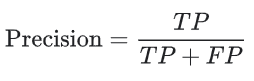

The Formula for Recall is:

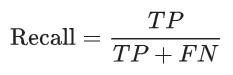

Later, the losgistic regression model is applied to the dataset and again accuracy and ROC for the model is calculated. Confusion matrix is used to calculate the accuracy, ROC, precision and recall.

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

lr = LogisticRegression()
lr.fit(trainX,trainY)

predicted = lr.predict(testX)
probs = lr.predict_proba(testX)
lr_score = metrics.accuracy_score(testY, predicted)
print(f"Accuracy score = {lr_score}")
print(f"ROC AUC Score = {roc_auc_score(testY, probs[:,1])}")
print("===================================================")
print("Confusion Matrix")
print(metrics.confusion_matrix(testY, predicted))
print("===================================================")
print(metrics.classification_report(testY, predicted))

Accuracy score = 0.6961040374360649
ROC AUC Score = 0.7596019439966648
Confusion Matrix
[[33855 12416]
 [15509 30110]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71     46271
           1       0.71      0.66      0.68     45619

    accuracy                           0.70     91890
   macro avg       0.70      0.70      0.70     91890
weighted avg       0.70      0.70      0.70     91890



The final accuracy that is calculated is nearly 70% when calculated in confusion matrix. The fianl ROC value is 75% which is good.

#### Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data, i.e, it uses a limited sample in order to estimate how the model is expected to perform.

The process of KNN model is applied with cross validation using cross_val_score library and all the accuracy scores and colleted and the mean of these scores are calculated and compared to the above model.

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_top_5_features, Y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.69955926 0.69693111 0.6920666  0.69277984 0.69632217]
0.695531795958242


The mean accuracy for KNN after cross validation is 69.5% which is very close to the accuracy without cross validation.

#### Decision Tree

Decision Tree is a type of Supervised Machine Learning, i.e, you explain what the input is and what the corresponding output is in the training data is, and where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes while, the decision nodes are where the data is split. 

The decision tree model is applied to the training and testing dataset and each step accuracy is collected in a list and then the mean of all the accuracy is calculated for decision tree model.

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_top_5_features,Y)
scores_dt = cross_val_score(model_dt,X_top_5_features,Y,scoring='accuracy',cv=5)
print(scores_dt)
print(scores_dt.mean())

[0.71496898 0.71934378 0.71420176 0.7173803  0.71574789]
0.7163285443297206


The accuracy is 71.6% for the model which is the best when compared to the all the models that have been applied so far to the dataset.

The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

The formula to calculate F1 is:

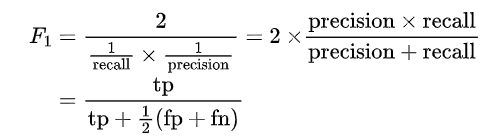

The F1 score for the dataset is also calculated using cross validation, in each step the F1 score is measured and stored in a list. The, mean of this list is the F1 score of the model. this is calculated as it is the best model that has been applied so far to the dataset.

In [24]:
dt_f1_scores = cross_val_score(model_dt,X_top_5_features,Y,scoring='f1',cv=5)
print(dt_f1_scores)
print(dt_f1_scores.mean())

[0.71276298 0.71693522 0.7134685  0.71447141 0.71319079]
0.7141657803427768


The F1 score for the model is 71% for Decision tree.

The ROC for the Decision tree classifier is calculated in the same maner and the mean of these is the actual ROC value of the dataset.

In [25]:
dt_roc_scores = cross_val_score(model_dt,X_top_5_features,Y,scoring='roc_auc',cv=5)
print(dt_roc_scores)
print(dt_roc_scores.mean())

[0.71516345 0.71826743 0.71428697 0.71723085 0.71525259]
0.7160402584399235


The final ROC is 71% which is not better than ROC of logistic regression.

#### Random Forest Model

Random forest is a popular machine learning algorithm. It can be used for both Classification and Regression problems. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The final model that is applied to the dataset is Random forest classifier model. The model is applied through the process of cross validation. The same process as above is applied to measure the accuracy, F1 score and ROC for the model.

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=15)
model_rf.fit(X_top_5_features,Y)

scores_rf = cross_val_score(model_rf,X_top_5_features,Y,scoring='accuracy',cv=5)
print(scores_rf)
print(scores_rf.mean())

[0.74557623 0.74991838 0.7464414  0.74604548 0.75092639]
0.74778157679358


The accuracy for the model is 74.7% which is the best accuracy recorded so far for any of the models which have been applied so far. 

In [27]:
rf_f1_scores = cross_val_score(model_rf,X_top_5_features,Y,scoring='f1',cv=5)
print(rf_f1_scores)
print(rf_f1_scores.mean())

[0.75325567 0.74898534 0.74481274 0.74048319 0.74883713]
0.7472748117136643


The F1 score calculated is 74.7%, Again this is higher compared to all the recorded F1 scores of the models.

In [28]:
rf_roc_scores = cross_val_score(model_rf,X_top_5_features,Y,scoring='roc_auc',cv=5)
print(rf_roc_scores.mean())

0.8185599108416135


The ROC index is 81.8% which is again the hightest when compared to the other ROC indices.

Now that all the models have been applied to the dataset and the accuracy has been recoded for each model. All the accuracies are plotted and the model which has the best accuracy rate is choosen for the prediction model.

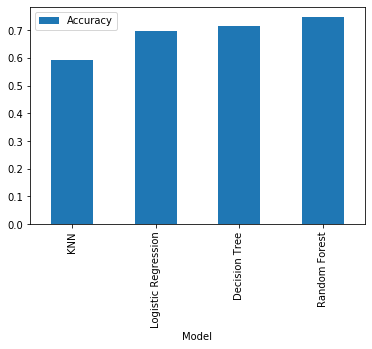

In [29]:
d = {'Model':['KNN','Logistic Regression','Decision Tree','Random Forest'],'Accuracy':[knn_score,scores.mean(),scores_dt.mean(),scores_rf.mean()]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')

Looking at the graph that has been plotted we can finally come to a conclusion that the best model which gives the highest accuracy when applied to the dataset is Random forest classifier. Thus, this model is selected and deployed on the complete dataset to predict the popularity of the list of songs in the dataset.

### Model Development

On applying the random forest classifier to the complete dataset we checked if there were any errors that occur during the deployment process. We didnot encounter any errors. Thus, we calculated the cunfusion matrix for the dataset using the cross_val_predict library and confusion matrix library.

In [30]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_rf,X_top_5_features,Y,cv=5)

print(metrics.confusion_matrix(Y,y_pred))

[[114479  39754]
 [ 37842 114223]]


Using the above confusion matrix we calculated precision, recall, F1 score and accuracy for the deployed or the final model to check if the model is working as good on the complete dataset as it wos working for the training an testing dataset seperately. The final results are displayed in the matrix below.

In [31]:
print(metrics.classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75    154233
           1       0.74      0.75      0.75    152065

    accuracy                           0.75    306298
   macro avg       0.75      0.75      0.75    306298
weighted avg       0.75      0.75      0.75    306298



### Evaluation

Looking at the derived matrix we could conclude that the precision for the final model is 75%, the recall for the selected model is 74%, F1 score for the model is 75% and the complete accuracy is 75%. 

As the accuracy is above 70% we can accept this model as other machine learning models would have given a lower accuracy score when compared to random forest classifier as we have seen when applying the models to the training dataset. Thus, we could conclde that the best accuracy for the final model will be given by random forest classifier and the accuracy of the model is 75%. 

To represnt the ROC plot we considers the true positive rate and false negetive rate that was presicted by the final model and ploted it in the graph below. The Dotted line represents how the ROC curve would have been without the prediction and the blue line represents how the ROC curve is after the prediction.

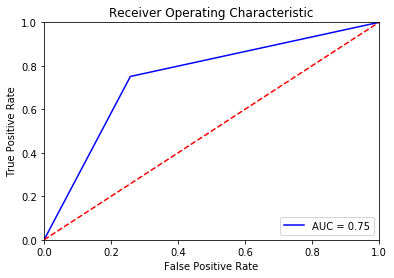

In [32]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y,y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Conclusion

Finally we were able to predict if the song will be popular or not using random forest classifier model. This model was built and compared to various other machine learning models. We calculated various parameters of each model to check whether the model's accuracy is currect or not. Considering all the parametes we were finally able to conclude on which machine learning model is best suited for the selected dataset.